In [1]:
import pandas as pd 
from scipy import stats
import numpy as np

#open dataset
df0 = pd.read_csv("20220105_company_emissions_data.csv", sep=',')

#drop irrelevant columns from dataset
df1 = df0.drop(columns=['WorkforceDataPoints.AsianMinoritiesEmployeesPercent',
                       'WorkforceDataPoints.AsianMinoritiesManagersPercent', 
                      'WorkforceDataPoints.AverageEmployeeLengthOfService',
                      'WorkforceDataPoints.AverageTrainingHours', 
                      'WorkforceDataPoints.BbbeeLevel', 
                      'WorkforceDataPoints.BlackOrAfricanAmericanMinoritiesEmployeesPercent',
                      'WorkforceDataPoints.BlackOrAfricanAmericanMinoritiesManagersPercent',
                      'WorkforceDataPoints.ContractorAccidents',
                      'WorkforceDataPoints.ContractorFatalities',
                      'WorkforceDataPoints.ContractorLostWorkingDays',
                      'WorkforceDataPoints.DayCareServices',
                      'WorkforceDataPoints.DiversityAndOpportunityControversies',
                      'WorkforceDataPoints.EmployeeAccidents',
                      'WorkforceDataPoints.EmployeeFatalities',
                      'WorkforceDataPoints.EmployeeHealthAndSafetyTrainingHours',
                      'WorkforceDataPoints.EmployeeLostWorkingDays',
                      'WorkforceDataPoints.EmployeeResourceGroups',
                      'WorkforceDataPoints.EmployeeSatisfaction',
                      'WorkforceDataPoints.EmployeesHealthAndSafetyControversies',
                      'WorkforceDataPoints.EmployeesHealthAndSafetyOhsas18001',
                      'WorkforceDataPoints.EmployeesHealthAndSafetyTeam',
                      'WorkforceDataPoints.EmployeesWithDisabilities',
                      'WorkforceDataPoints.FlexibleWorkingHours',
                      'WorkforceDataPoints.GenderPayGapPercentage',
                      'WorkforceDataPoints.HealthAndSafetyTraining',
                      'WorkforceDataPoints.HispanicOrLatinoMinoritiesEmployeesPercent',
                      'WorkforceDataPoints.HispanicOrLatinoMinoritiesManagersPercent',
                      'WorkforceDataPoints.HivAidsProgram',
                      'WorkforceDataPoints.HrcCorporateEqualityIndex',
                      'WorkforceDataPoints.HsmsCertifiedPercentage',
                      'WorkforceDataPoints.InternalPromotion',
                      'WorkforceDataPoints.InvoluntaryTurnoverOfEmployees',
                      'WorkforceDataPoints.LostTimeInjuryRateContractors',
                      'WorkforceDataPoints.LostTimeInjuryRateEmployees',
                      'WorkforceDataPoints.LostTimeInjuryRateTotal',
                      'WorkforceDataPoints.LostWorkingDays',
                      'WorkforceDataPoints.ManagementDepartures',
                      'WorkforceDataPoints.ManagementTraining',
                      'WorkforceDataPoints.MinoritiesEmployeesPercent',
                      'WorkforceDataPoints.MinoritiesManagersPercent',
                      'WorkforceDataPoints.MinoritiesSalaryGapPercent',
                      'WorkforceDataPoints.NewWomenEmployees',
                      'WorkforceDataPoints.NumberOfEmployeesFromCsrReporting',
                      'WorkforceDataPoints.OccupationalDiseases',
                      'WorkforceDataPoints.OtherMinoritiesEmployeesPercent',
                      'WorkforceDataPoints.OtherMinoritiesManagersPercent',
                      'WorkforceDataPoints.PolicyCareerDevelopment',
                      'WorkforceDataPoints.PolicyDiversityAndOpportunity',
                      'WorkforceDataPoints.PolicyEmployeeHealthAndSafety',
                      'WorkforceDataPoints.PolicySkillsTraining',
                      'WorkforceDataPoints.PolicySupplyChainHealthAndSafety',
                      'WorkforceDataPoints.RecentDiversityOpportunityControversies',
                      'WorkforceDataPoints.RecentEmployeeHealthAndSafetyControversies',
                      'WorkforceDataPoints.RecentWagesWorkingConditionControversies',
                      'WorkforceDataPoints.SalariesAndWagesFromCsrReporting',
                      'WorkforceDataPoints.Strikes',
                      'WorkforceDataPoints.SupplierESGTraining',
                      'WorkforceDataPoints.SupplyChainHealthAndSafetyImprovements',
                      'WorkforceDataPoints.SupplyChainHealthAndSafetyTraining',
                      'WorkforceDataPoints.TargetsDiversityAndOpportunity',
                      'WorkforceDataPoints.TotalInjuryRateContractors',
                      'WorkforceDataPoints.TotalInjuryRateEmployees',
                      'WorkforceDataPoints.TotalInjuryRateTotal',
                      'WorkforceDataPoints.TradeUnionRepresentation',
                      'WorkforceDataPoints.TrainingCostsTotal',
                      'WorkforceDataPoints.TrainingHoursTotal',
                      'WorkforceDataPoints.TurnoverOfEmployees',
                      'WorkforceDataPoints.VoluntaryTurnoverOfEmployees',
                      'WorkforceDataPoints.WagesWorkingConditionControversiesCount',
                      'WorkforceDataPoints.WhiteMinoritiesEmployeesPercent',
                      'WorkforceDataPoints.WhiteMinoritiesManagersPercent',
                      'WorkforceDataPoints.WomenEmployees',
                      'WorkforceDataPoints.WomenManagers',
                      'WorkforceIndicators.AnnouncedLayOffsToTotalEmployees',
                      'WorkforceIndicators.HealthAndSafetyPolicy',
                      'WorkforceIndicators.InjuriesToMillionHours',
                      'WorkforceIndicators.LostDaysToTotalDays',
                      'WorkforceIndicators.NetEmploymentCreation',
                      'WorkforceIndicators.SalaryGap',
                      'WorkforceIndicators.TrainingAndDevelopmentPolicy',
                      'WorkforceIndicators.TrainingCostsPerEmployee',
                      'WorkforceIndicators.WagesWorkingConditionControversies'],
                      axis=1)
    
#number of columns in (cleaned) dataset
len(df0.columns)
len(df1.columns)

#df1.sort_values(['GTAP sector'], ascending=[True], inplace=True)
display(df1)

#save cleaned dataset as new file
df = df1.to_csv('company_emissions_cleaned.csv', index=True)

,organization_id,StatementDetails.FinancialPeriodEndDate,StatementDetails.FinancialPeriodFiscalYear,StatementDetails.FinancialPeriodIsIncomplete,StatementDetails.EsgOrAtdIndicator,EmissionDataPoints.AccidentalSpills,EmissionDataPoints.AnalyticCO2EstimationMethod,EmissionDataPoints.AnalyticEstimatesCO2EquivalentsEmissionTotal,EmissionDataPoints.BiodiversityImpactReduction,EmissionDataPoints.CarbonOffsetsCredits,...,ResourceUseDataPoints.TargetsEnergyEfficiency,ResourceUseDataPoints.TargetsWaterEfficiency,ResourceUseDataPoints.TotalRenewableEnergy,ResourceUseDataPoints.ToxicChemicalsReduction,ResourceUseDataPoints.WaterRecycled,ResourceUseDataPoints.WaterWithdrawalTotal,WorkforceDataPoints.AccidentsTotal,WorkforceDataPoints.AnnouncedLayOffs,GTAP country,GTAP sector
0,2352,2006-12-31T00:00:00.000Z,2006,False,ESG,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Ireland,Null
1,10113,2018-12-31T00:00:00.000Z,2018,False,ESG,NaN,Median,285.0,0.0,NaN,...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,United States of America,Null
2,6230,2011-12-31T00:00:00.000Z,2011,False,ESG,NaN,Reported,129206.0,1.0,NaN,...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,United States of America,Forestry
3,6360,2012-12-31T00:00:00.000Z,2012,True,ATD,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,Transport nec
4,841,2006-12-31T00:00:00.000Z,2006,False,ESG,0.076,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,523000000.0,107.0,NaN,Canada,Electricity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101101,8473,2017-12-31T00:00:00.000Z,2017,True,ATD,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,Insurance
101102,2907,2010-03-31T00:00:00.000Z,2010,False,ESG,NaN,Reported,18764182.0,1.0,NaN,...,1.0,1.0,NaN,0.0,NaN,739071.0,NaN,NaN,Japan,Water transport
101103,12417,2014-12-31T00:00:00.000Z,2014,True,ATD,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,Financial services nec
101104,479,2009-06-30T00:00:00.000Z,2009,False,ESG,NaN,Energy,1696964.0,0.0,NaN,...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,Australia,Water


23911


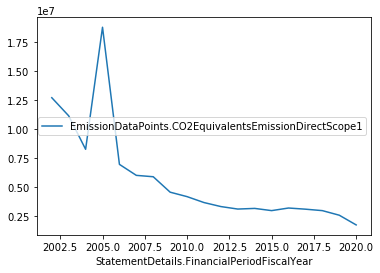

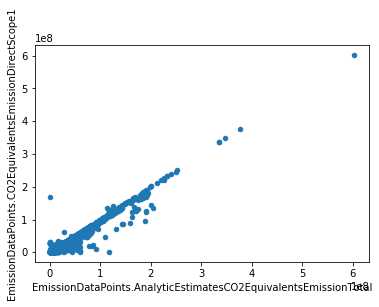

In [2]:
#drop rows with no data in either the year or target collumn
df2 = df1.dropna(subset=['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1', 'StatementDetails.FinancialPeriodFiscalYear'])
#df2 = df2[(np.abs(stats.zscore(df2['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1'])) < 3)]
#df2.loc[df2['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1']!=df2['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1'].max()]


#Make all data numeric
df2_numeric = df2.apply(pd.to_numeric, args=('coerce',))

#group data by year and calculate target mean for each year 
df2_grouped_by_year = df2_numeric.groupby('StatementDetails.FinancialPeriodFiscalYear').mean().apply(pd.to_numeric, args=('coerce',))

df2_grouped_by_year.reset_index().plot(x = 'StatementDetails.FinancialPeriodFiscalYear' ,y = 'EmissionDataPoints.CO2EquivalentsEmissionDirectScope1')

df2_numeric.plot.scatter(x='EmissionDataPoints.AnalyticEstimatesCO2EquivalentsEmissionTotal', y = 'EmissionDataPoints.CO2EquivalentsEmissionDirectScope1')

df2['StatementDetails.FinancialPeriodFiscalYear'].value_counts()

print(df2['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1'].argmax())

In [3]:
#Keep only numeric values for correlation calculations
df_full = df2.apply(pd.to_numeric, args=('coerce',))
df_full2 = df_full.select_dtypes(['number'])

#calculate correlations
cor = df_full2.corr()
cor_target = abs(cor['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1'])

#display Correlation values for features with a useable correlation
features = cor_target[cor_target > 0.5]
display(features)

EmissionDataPoints.AnalyticEstimatesCO2EquivalentsEmissionTotal    0.981030
EmissionDataPoints.CO2EquivalentsEmissionDirectScope1              1.000000
EmissionDataPoints.CO2EquivalentsEmissionTotal                     0.985258
EmissionDataPoints.FlaringGases                                    0.641745
EmissionDataPoints.VocEmissions                                    0.579600
Name: EmissionDataPoints.CO2EquivalentsEmissionDirectScope1, dtype: float64

In [4]:
#Remove the rows with null as given sector and print amount of sectors, and businesses per sector
df2_rename = df2.rename(columns={"GTAP sector": "sector"})
df2_sector_clean = df2_rename[df2_rename.sector != "Null"]
print(df2_sector_clean['sector'].nunique())
print(df2_sector_clean['sector'].value_counts())

#calculate mean of target per sector and print all of them
df2_grouped_by_sector = df2_sector_clean.groupby('sector').mean().apply(pd.to_numeric, args=('coerce',))
print("Mean of target by sector")
print(df2_grouped_by_sector['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1'])

51
Financial services nec                        2498
Computer, electronic and optical products     1568
Trade                                         1335
Electricity                                   1243
Real estate activities                        1037
Construction                                   932
Insurance                                      847
Communication                                  801
Chemical products                              787
Business services nec                          776
Other Extraction                               685
Basic pharmaceutical products                  667
Machinery and equipment nec                    564
Petroleum, coal products                       485
Bovine cattle, sheep and goats, horses         478
Gas                                            417
Transport nec                                  379
Motor vehicles and parts                       350
Fishing                                        343
Mineral products nec        

In [5]:
from sklearn import linear_model

#Hernoemt de columns omdat de '.' in de namen voor problemen zorgt
df1 = df1.rename(columns={'EmissionDataPoints.CO2EquivalentsEmissionDirectScope1': 'scope', 'StatementDetails.FinancialPeriodFiscalYear': "year"})


#hele lompe manier van rijen verwijderen in 2005 die heel raar doen
df1 = df1.drop(df1[(df1['year'] == 2005) & (df1['scope'] > 100000000)].index)

#Verwijdert de NaN's
df1 = df1.dropna(subset=['scope', 'year']) 

#sorteert per jaar en neemt dan de gemiddelde van elk jaar. Zodat je dan één lijn krijgt
df1_means = df1.groupby('year').mean().reset_index()

#maakt array van de column
y = df1_means.scope.values
x = df1_means.year.values

#iets van stack-overflow zodat de dimensies kloppen voor de lineaire regressie.
#Als iets niet helemaal klopt in de resultaten zou het hiermee te maken kunnen 
#hebben, want ik snap niet precies wat hier gebeurt
length = len(df1_means) 
x = x.reshape(length, 1)   
y = y.reshape(length, 1)

#stukkie sklearn
reg = linear_model.LinearRegression()
reg = reg.fit(x,y)

#richtingscoëfficiënt
reg.coef_


array([[-462955.05784842]])

In [6]:
import matplotlib.pyplot as plt

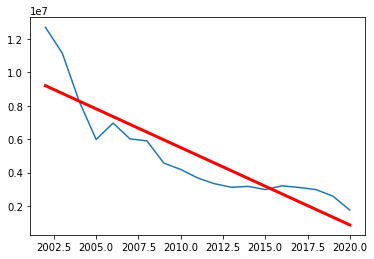

[-886807.66782755]


In [7]:
#plot de grafiek voor de lineaire regressie
plt.plot(x,y)
plt.plot(x, reg.predict(x), color='red', linewidth=3)
plt.show()


df1_means_indexed = df1.groupby('year').mean()

predicted = reg.predict(np.array(2020).reshape(-1, 1))[0]
actual = df1_means_indexed.scope[2020]
print(predicted- actual)

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [9]:
polyreg=make_pipeline(PolynomialFeatures(3),linear_model.LinearRegression())
polyreg.fit(x,y)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

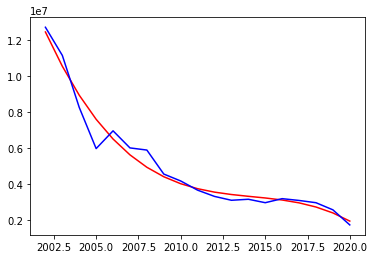

In [11]:
plt.plot(x,polyreg.predict(x),color="red")
plt.plot(x,y,color='blue')
plt.show()



In [12]:
#find best degree of polynomial
#Dit moet werken zonder 2020 meengenomen in de data (dus een aparte training en test set)


years = df1['year'].unique()
years.sort()

def best_poly_fit(x_array, y_array, actual_df, years, max_K=50):
    cost_best = 1000000000000
    costs = []
    i_list = list(range(max_K))
    for i in range(max_K):
        polyreg_i = make_pipeline(PolynomialFeatures(i),linear_model.LinearRegression())
        polyreg_i.fit(x_array, y_array)
        
        cost = 0
        for j in years:
            actual = actual_df.scope[j]
            predicted_poly = polyreg_i.predict(np.array(j).reshape(1, -1))
            cost += abs(predicted_poly - actual)
            
        
        
        
        costs.append(cost[0][0])
        #if(cost < cost_best):
            #cost_best = cost         
            #K_best = i
    
            
    return i_list, costs 

In [13]:
print(best_poly_fit(x, y, df1_means_indexed, years))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [43434280.94611615, 21151780.54658247, 10540935.523702752, 7143105.1093287915, 7141599.9862819165, 7137976.73384051, 7134316.265822932, 7130618.368972346, 7126883.140456721, 7123110.220534846, 7119299.652175471, 7115451.292800471, 7111564.915847346, 7107640.41882281, 7103677.75866656, 7099676.736205623, 7095637.334815547, 7091559.459815547, 7087442.662940547, 7083287.096534297, 7079092.741076991, 7074859.335803553, 7070586.626819178, 7066274.767444178, 7061923.574573085, 7057532.691754863, 7053102.365094706, 7048632.332868144, 7044122.353375956, 7039572.463239238, 7034982.494489238, 7030352.455915019, 7025682.038922831, 7020971.254743144, 7016220.037946269, 7011428.251325175, 7006595.653668925, 7001722.3314033, 6996808.0579658, 6991852.821149394, 6986856.531111762, 6981818.851912543, 6976739.9730

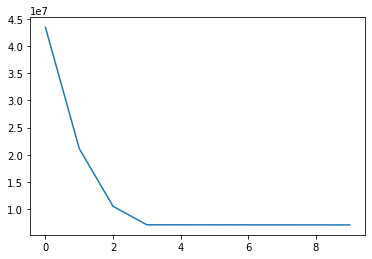

In [14]:
x2, y2 = best_poly_fit(x, y, df1_means_indexed, years, 10)
plt.plot(x2, y2)

#Dus beste polynomial is 3.

In [15]:
df1_sector = df1.rename(columns={"GTAP sector": "sector"})

#Function that can fit a polynomial prediction function over a certain sector given in the first argument
def sector_fit(sector, k):
    
    df_sector_only = df1_sector[df1_sector.sector == sector]
    df_sector_only.sort_values(['year'], ascending=[True], inplace=True)
    df_sector_means = df_sector_only.groupby('year').mean().reset_index()
    
    y_mean = df_sector_means.scope.values
    x_mean = df_sector_means.year.values
    
    y1 = df_sector_only.scope.values
    x1 = df_sector_only.year.values
    
    length = len(df_sector_only) 
    x1 = x1.reshape(length, 1)   
    y1 = y1.reshape(length, 1)
    
    polyreg=make_pipeline(PolynomialFeatures(k),linear_model.LinearRegression())
    polyreg.fit(x1,y1)
    
    plt.plot(x1,polyreg.predict(x1),color="red")
    plt.plot(x_mean,y_mean,color='blue')
    plt.show()
    
df1_sector['sector'].unique()
    

array(['Forestry', 'Construction', 'Null', 'Oil', 'Gas', 'Communication',
       'Manufactures nec', 'Beverages and tobacco products', 'Trade',
       'Motor vehicles and parts', 'Electricity', 'Fishing',
       'Water transport', 'Computer, electronic and optical products',
       'Financial services nec', 'Chemical products',
       'Warehousing and support activities', 'Metal products',
       'Insurance', 'Other Extraction', 'Water', 'None',
       'Basic pharmaceutical products', 'Sugar cane, sugar beet',
       'Real estate activities', 'Textiles', 'Electrical equipment',
       'Transport nec', 'Recreational and other services',
       'Accommodation, Food and service activities',
       'Business services nec', 'Animal products nec',
       'Vegetables, fruit, nuts', 'Machinery and equipment nec',
       'Rubber and plastic products', 'Education',
       'Petroleum, coal products', 'Food products nec',
       'Transport equipment nec', 'Mineral products nec',
       'Bovine cat

<ipython-input-15-ff247f1db5b8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sector_only.sort_values(['year'], ascending=[True], inplace=True)


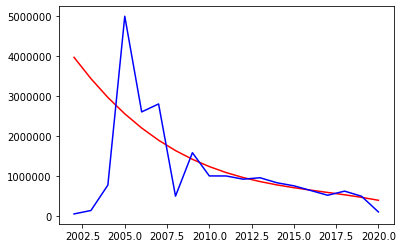

In [16]:
# fits a polynomial
sector_fit('Construction',3)

<ipython-input-17-4765887c46ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.sort_values(['year'], ascending=[True], inplace=True)


,organization_id,StatementDetails.FinancialPeriodEndDate,year,StatementDetails.FinancialPeriodIsIncomplete,StatementDetails.EsgOrAtdIndicator,EmissionDataPoints.AccidentalSpills,EmissionDataPoints.AnalyticCO2EstimationMethod,EmissionDataPoints.AnalyticEstimatesCO2EquivalentsEmissionTotal,EmissionDataPoints.BiodiversityImpactReduction,EmissionDataPoints.CarbonOffsetsCredits,...,ResourceUseDataPoints.TargetsEnergyEfficiency,ResourceUseDataPoints.TargetsWaterEfficiency,ResourceUseDataPoints.TotalRenewableEnergy,ResourceUseDataPoints.ToxicChemicalsReduction,ResourceUseDataPoints.WaterRecycled,ResourceUseDataPoints.WaterWithdrawalTotal,WorkforceDataPoints.AccidentsTotal,WorkforceDataPoints.AnnouncedLayOffs,GTAP country,GTAP sector
3883,6589,2002-12-31T00:00:00.000Z,2002,False,ESG,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,4.618202e+07,NaN,1860.0,United States of America,Chemical products
18656,4441,2002-03-30T00:00:00.000Z,2002,False,ESG,NaN,NaN,NaN,1.0,NaN,...,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,United Kingdom,Trade
85968,1891,2002-12-31T00:00:00.000Z,2002,False,ESG,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,7.750000e+06,NaN,2200.0,Germany,Chemical products
27836,746,2002-12-31T00:00:00.000Z,2002,False,ESG,14.681,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Canada,Transport nec
48755,5879,2002-12-31T00:00:00.000Z,2002,False,ESG,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,1.0,NaN,1.283400e+07,NaN,75.0,United States of America,Basic pharmaceutical products
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3652,9235,2019-12-31T00:00:00.000Z,2019,False,ESG,NaN,Reported,188613.0,1.0,NaN,...,1.0,1.0,27000.0,0.0,NaN,6.294512e+06,NaN,NaN,United States of America,"Accommodation, Food and service activities"
49672,1052,2019-10-31T00:00:00.000Z,2019,False,ESG,NaN,Reported,5231.0,0.0,NaN,...,1.0,0.0,NaN,0.0,NaN,NaN,62.0,NaN,Canada,Financial services nec
68104,3251,2019-12-31T00:00:00.000Z,2019,False,ESG,0.000,Reported,540162.0,0.0,NaN,...,0.0,0.0,62190.0,0.0,NaN,1.150100e+07,NaN,NaN,Netherlands,"Vegetables, fruit, nuts"
68064,13890,2019-12-31T00:00:00.000Z,2019,False,ESG,0.000,Reported,1495567.0,1.0,NaN,...,0.0,0.0,NaN,0.0,NaN,1.325640e+03,NaN,NaN,United States of America,Transport nec


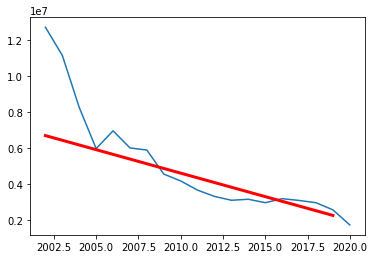

In [17]:
#gebruik alle data punten ipv mean
training_data = df1[df1.year != 2020]
training_data.sort_values(['year'], ascending=[True], inplace=True)
test_data = df1[df1.year == 2020]

display(training_data)

y1 = training_data.scope.values
x1 = training_data.year.values

length = len(training_data) 
x1 = x1.reshape(length, 1)   
y1 = y1.reshape(length, 1)

reg = linear_model.LinearRegression()
reg = reg.fit(x1,y1)

plt.plot(x,y)
plt.plot(x1, reg.predict(x1), color='red', linewidth=3)
plt.show()



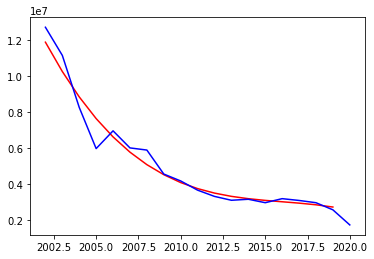

In [18]:
#polynomial regression met alle datapunten doet dit???
polyreg=make_pipeline(PolynomialFeatures(3),linear_model.LinearRegression())
polyreg.fit(x1,y1)

plt.plot(x1,polyreg.predict(x1),color="red")
plt.plot(x,y,color='blue')
plt.show()


In [24]:
df1_organization = df1.rename(columns={"organization_id": "id"})

#Function that can fit a polynomial prediction function over a certain organization given in the first argument
def organization_fit(id, k):
    
    df_id_only = df1_organization[df1_organization.id == id]
    df_id_only2 = df_id_only[['id', 'scope', 'year', 'GTAP sector']]
    sector = df_id_only['GTAP sector'].unique()[0]
    print(sector)
    df_sorted1 = df_id_only2.sort_values(['year'], ascending=[True], inplace=False)
    
    final_year = df_sorted1['year'].max()
    final_target = df_sorted1.loc[df_sorted1['year'] == final_year].iloc[0]['scope']
    added_bias = pd.DataFrame([[id, final_target, final_year + 1, sector]], columns=['id', 'scope', 'year', 'GTAP sector'])
    
    
    df_sorted1 = pd.concat([df_sorted1, added_bias])
    
    y1 = df_sorted1.scope.values
    x1 = df_sorted1.year.values
    
    length = len(df_sorted1) 
    x1 = x1.reshape(length, 1)   
    y1 = y1.reshape(length, 1)
    
    polyreg=make_pipeline(PolynomialFeatures(k),linear_model.LinearRegression())
    polyreg.fit(x1,y1)
    
    plt.plot(x1,polyreg.predict(x1),color="red")
    plt.plot(x1,y1,color='blue')
    plt.show()
    
    
def fit_validation(id, k):
    df_id_only = df1_organization[df1_organization.id == id]
    df_id_only2 = df_id_only[['id', 'scope', 'year', 'GTAP sector']]
    sector = df_id_only['GTAP sector'].unique()[0]
    print(sector)
    df_sorted1 = df_id_only2.sort_values(['year'], ascending=[True], inplace=False)
    
    final_year = df_sorted1['year'].max()
    train_df= df_sorted1.loc[df_sorted1['year']!= final_year]
    
    new_final_year = final_year -1
    if new_final_year not in train_df.year.values:
        return 0 
    final_target = train_df.loc[train_df['year'] == new_final_year].iloc[0]['scope']
    added_bias = pd.DataFrame([[id, final_target, final_year, sector]], columns=['id', 'scope', 'year', 'GTAP sector'])
    
    
    train_df = pd.concat([train_df, added_bias])
    
    y1 = train_df.scope.values
    x1 = train_df.year.values
    
    length = len(train_df) 
    x1 = x1.reshape(length, 1)   
    y1 = y1.reshape(length, 1)
    
    polyreg=make_pipeline(PolynomialFeatures(k),linear_model.LinearRegression())
    polyreg.fit(x1,y1)
    
    plt.plot(x1,polyreg.predict(x1),color="red")
    plt.plot(x1,y1,color='blue')
    plt.show()
    
    predicted_poly = polyreg.predict(np.array(final_year).reshape(1, -1))[0][0]
    actual = df_sorted1.loc[df_sorted1['year'] == final_year].iloc[0]['scope']
    
    print('actual:' + str(actual))
    print('predicted:'  + str(predicted_poly))
    
    error = abs((actual - predicted_poly)/actual)
    
    print('error:' + str(error))
    
    return error
    
    

Insurance


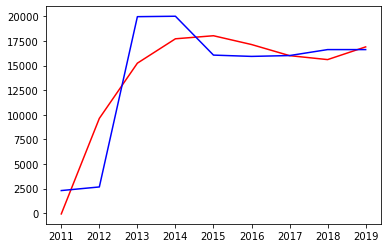

In [25]:
organization_fit(5,3)

Insurance


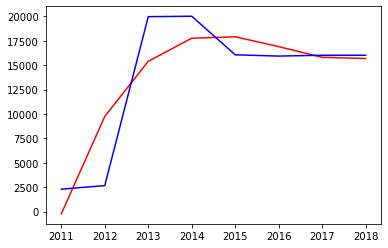

actual:16618.0
predicted:15677.025634765625
error:0.056623803420049044


0.056623803420049044

In [26]:
fit_validation(5,3)

Communication


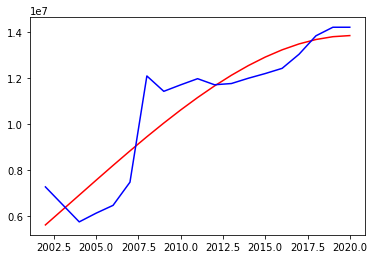

Manufactures nec


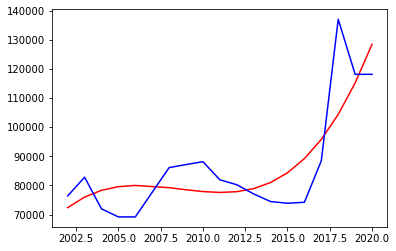

Null


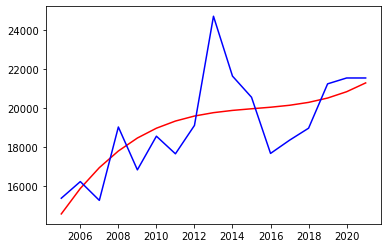

Other Extraction


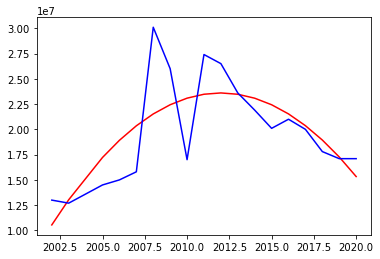

Other Extraction


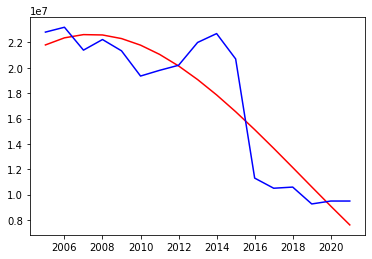

Transport nec


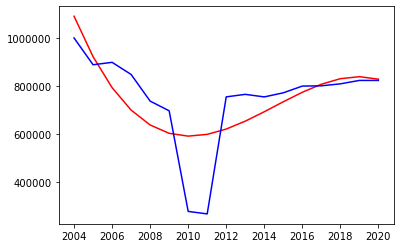

Computer, electronic and optical products


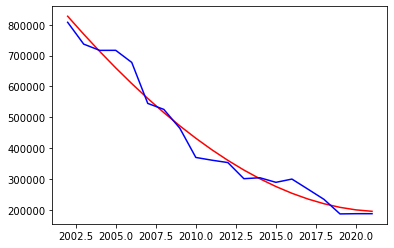

Communication


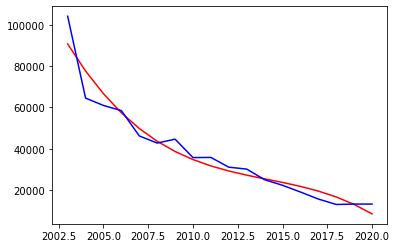

Chemical products


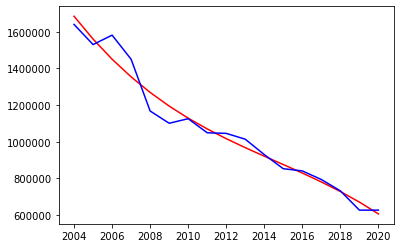

Chemical products


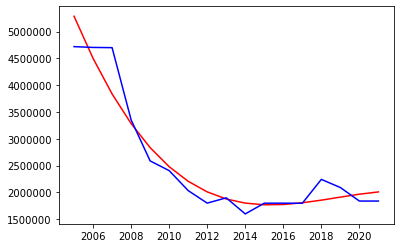

Chemical products


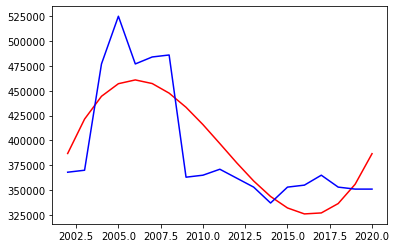

Other Extraction


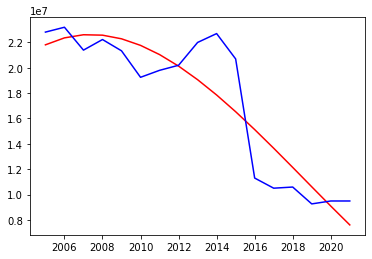

Metal products


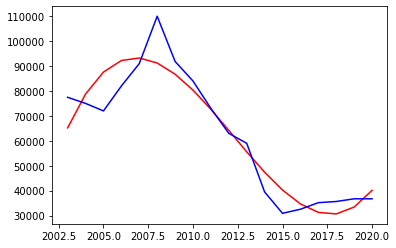

Null


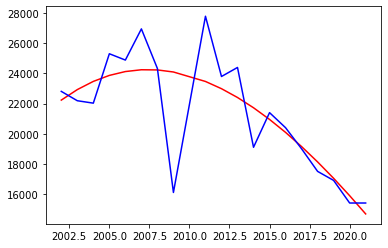

Electricity


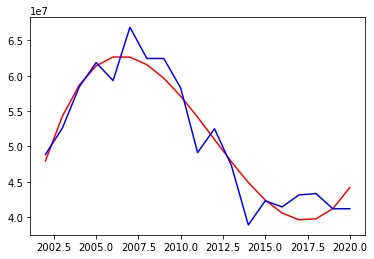

Null


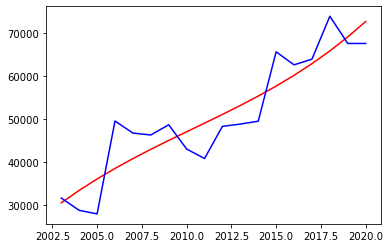

Financial services nec


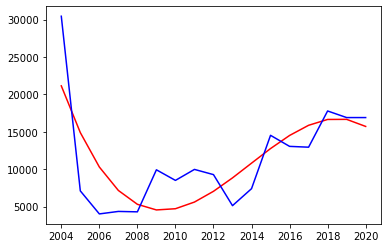

Electricity


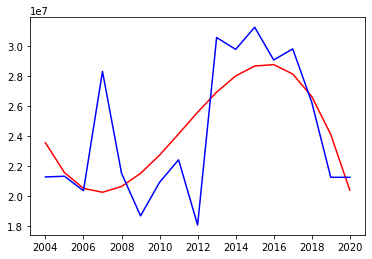

Basic pharmaceutical products


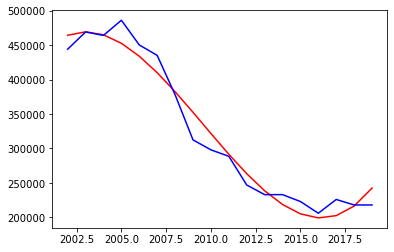

Bovine cattle, sheep and goats, horses


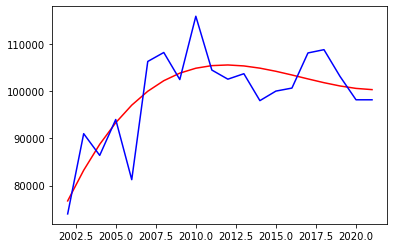

Manufactures nec


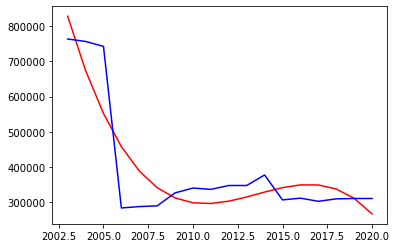

Basic pharmaceutical products


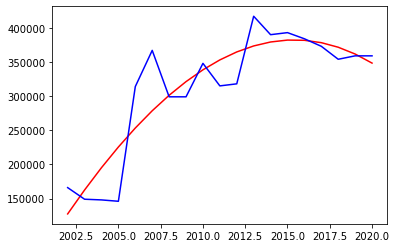

Null


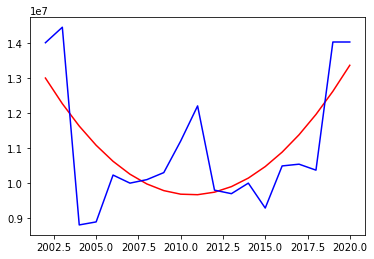

Computer, electronic and optical products


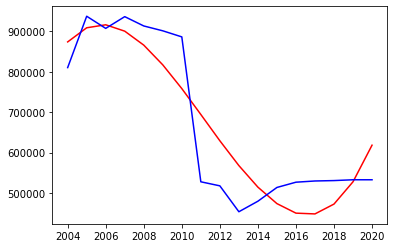

Computer, electronic and optical products


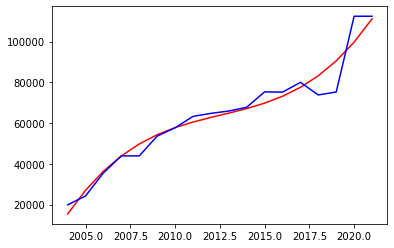

Real estate activities


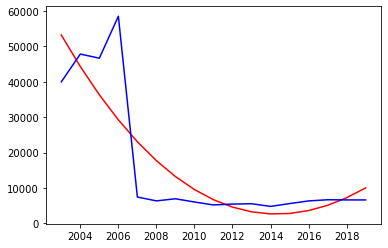

Bovine cattle, sheep and goats, horses


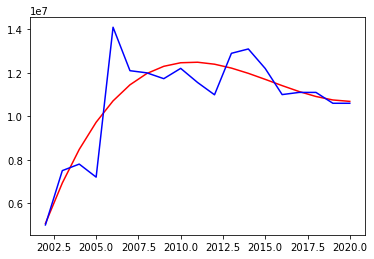

Null


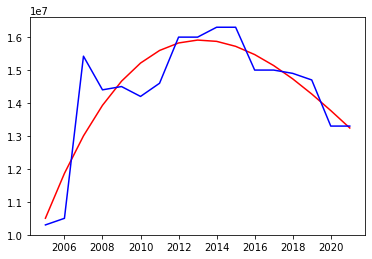

Null


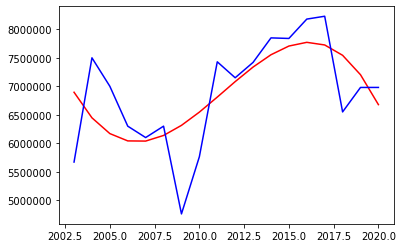

Null


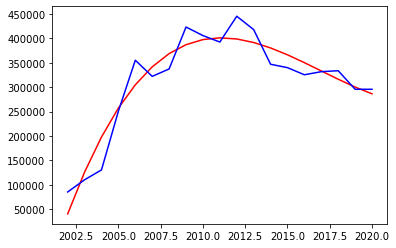

Electricity


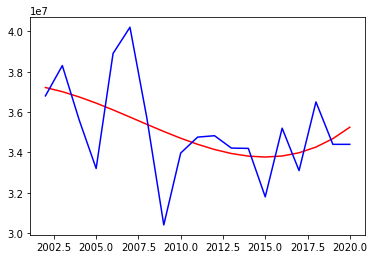

Computer, electronic and optical products


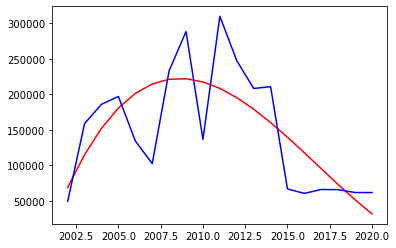

Null


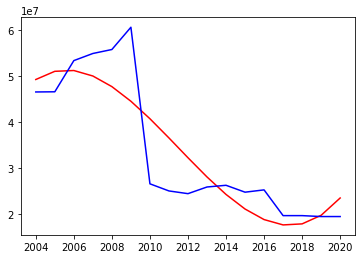

Rubber and plastic products


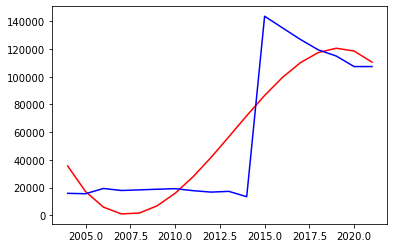

Petroleum, coal products


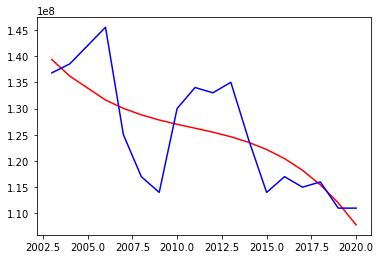

Petroleum, coal products


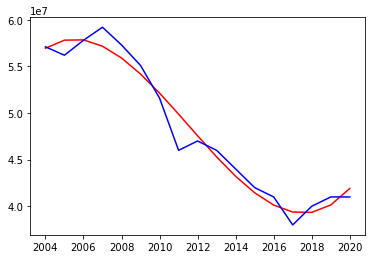

Bovine cattle, sheep and goats, horses


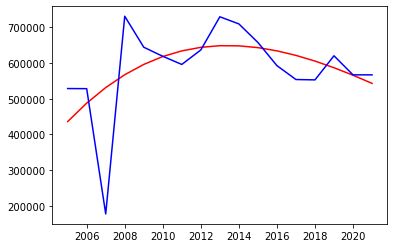

Beverages and tobacco products


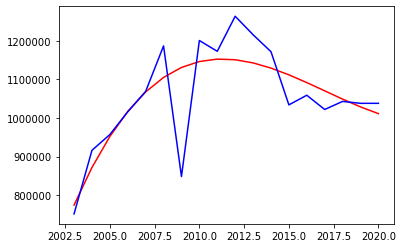

Ferrous metals


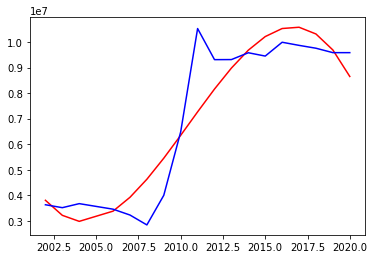

Other Extraction


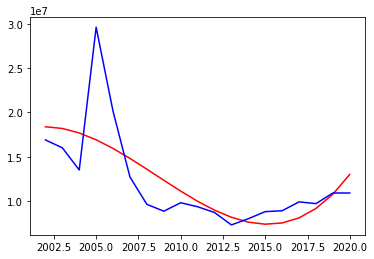

Computer, electronic and optical products


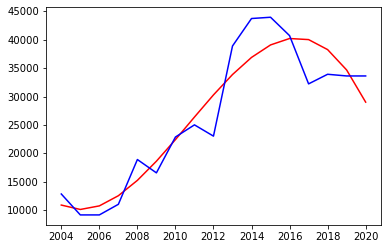

Basic pharmaceutical products


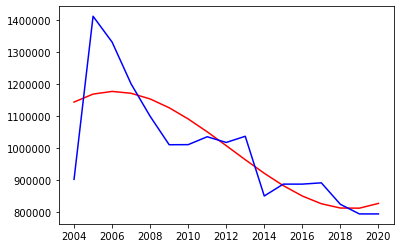

Bovine cattle, sheep and goats, horses


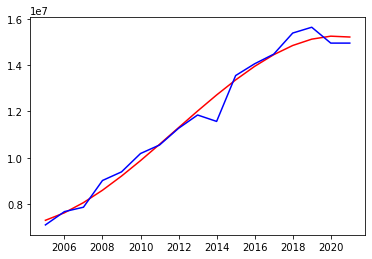

Computer, electronic and optical products


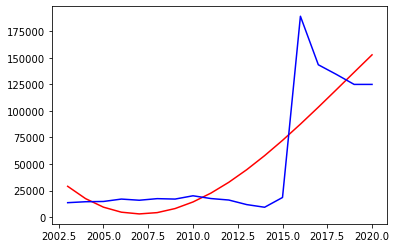

Petroleum, coal products


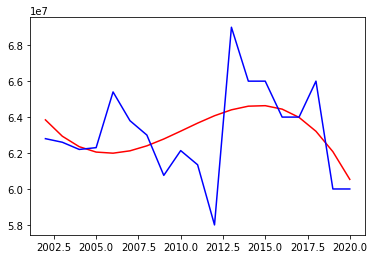

Bovine cattle, sheep and goats, horses


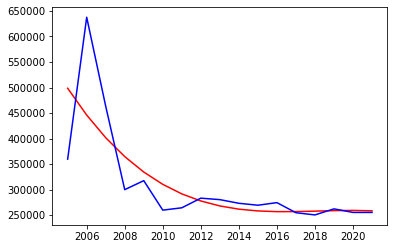

Electrical equipment


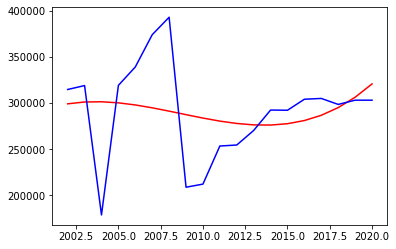

Construction


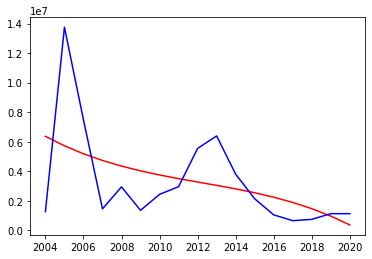

Basic pharmaceutical products


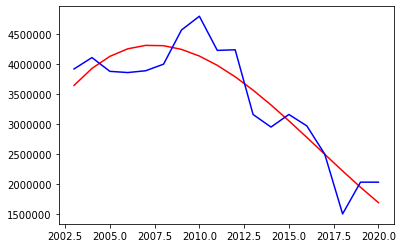

Ferrous metals


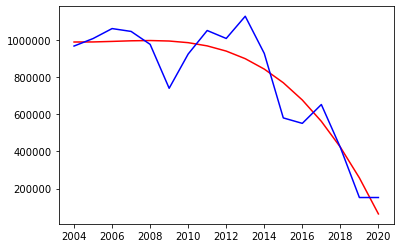

Basic pharmaceutical products


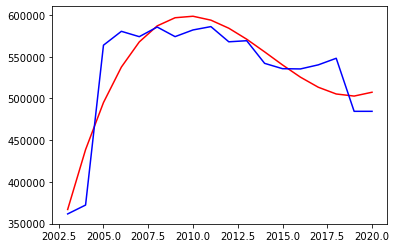

Water


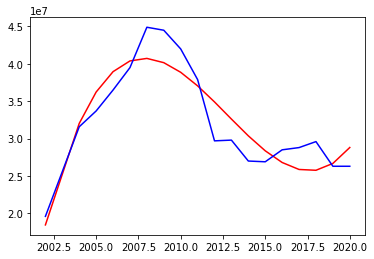

Null


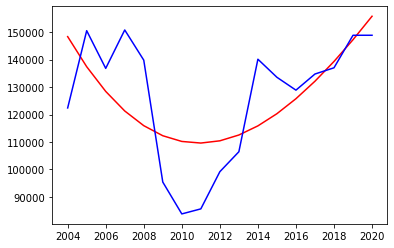

Null


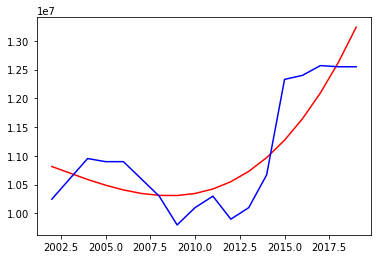

Oil


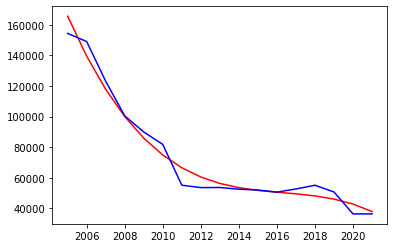

Fishing


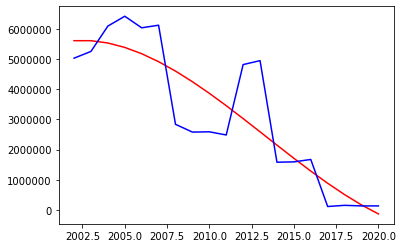

Real estate activities


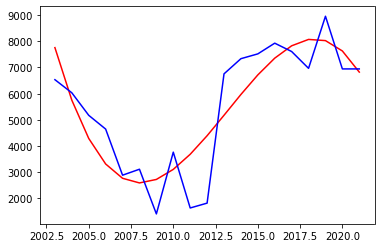

Accommodation, Food and service activities


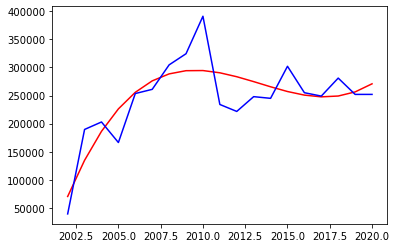

Financial services nec


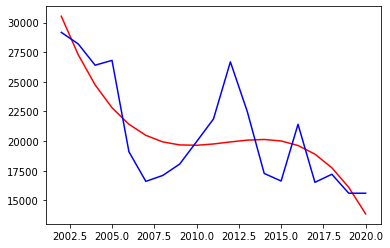

Machinery and equipment nec


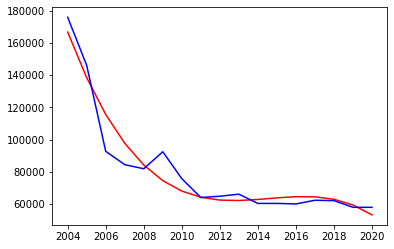

Motor vehicles and parts


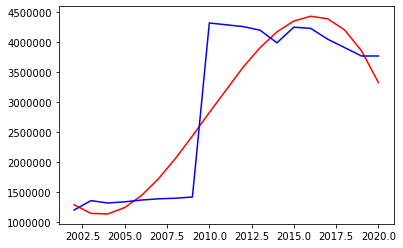

Trade


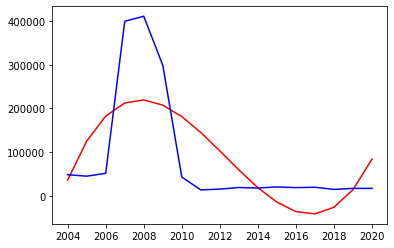

Null


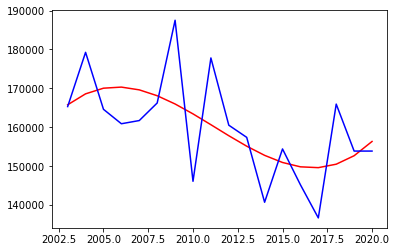

Machinery and equipment nec


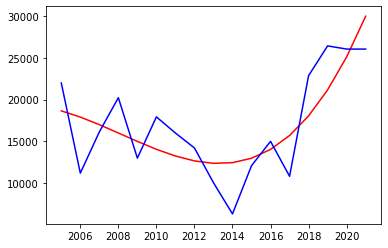

Null


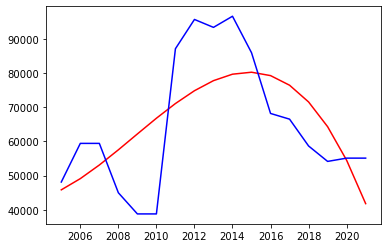

Computer, electronic and optical products


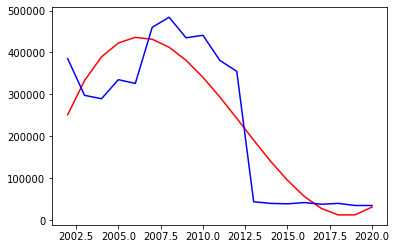

Financial services nec


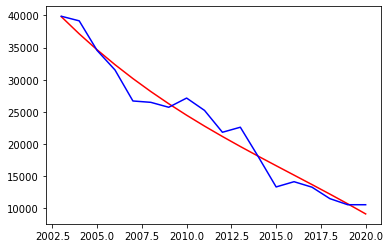

Real estate activities


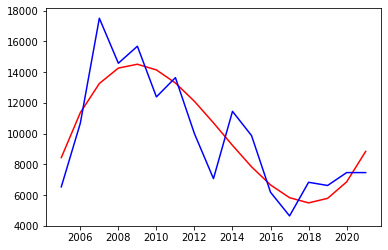

Insurance


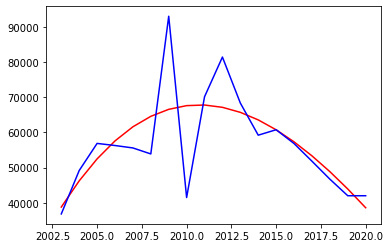

Transport nec


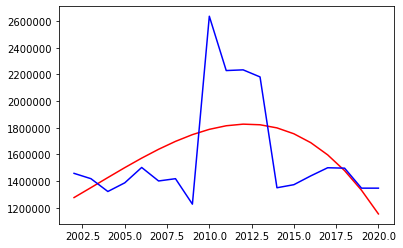

Null


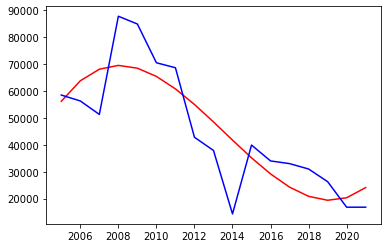

Machinery and equipment nec


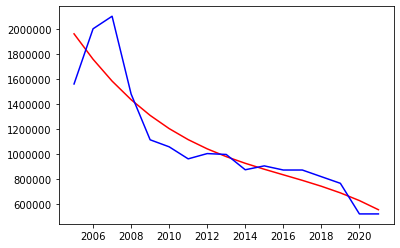

Motor vehicles and parts


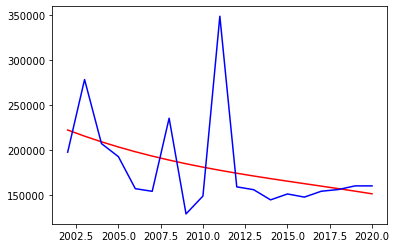

Machinery and equipment nec


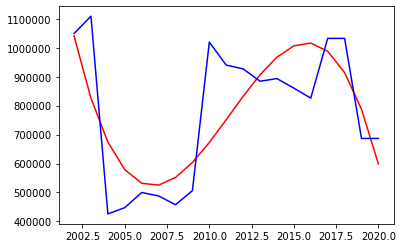

Petroleum, coal products


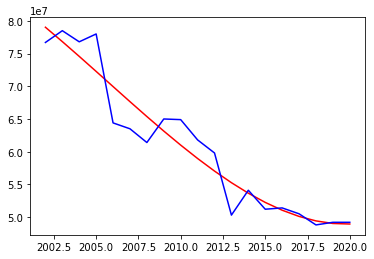

Computer, electronic and optical products


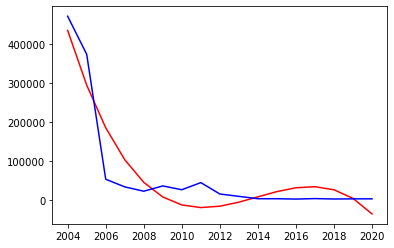

Null


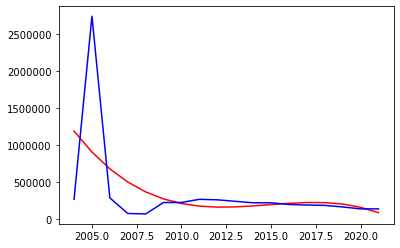

Basic pharmaceutical products


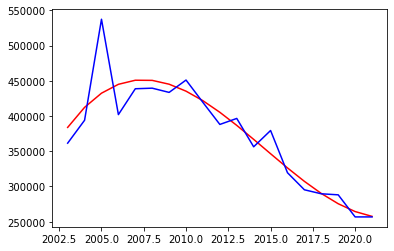

Electricity


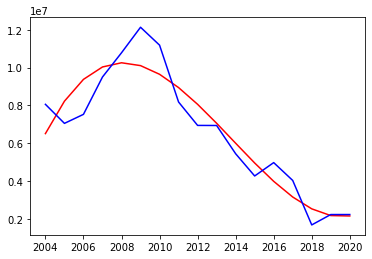

Transport nec


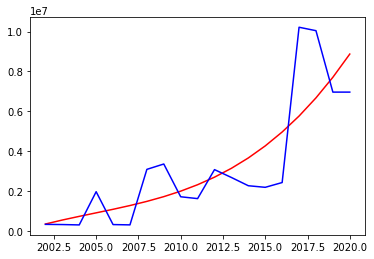

Chemical products


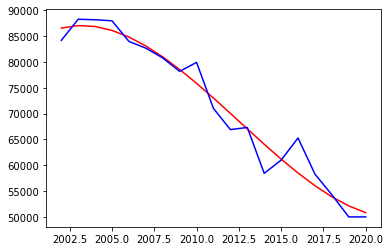

Motor vehicles and parts


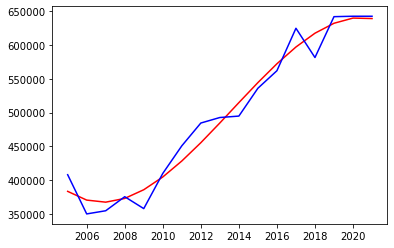

Petroleum, coal products


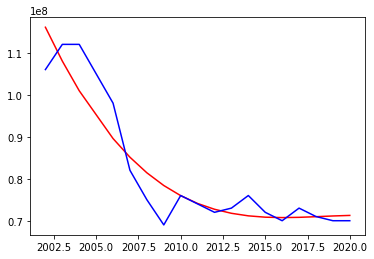

Bovine cattle, sheep and goats, horses


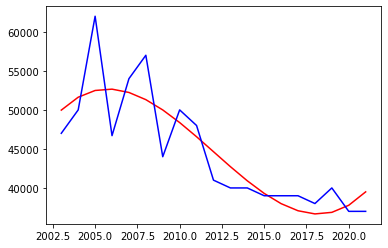

Null


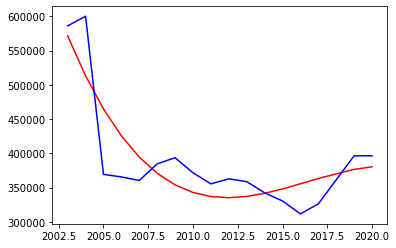

Null


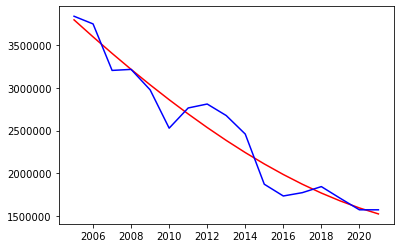

Trade


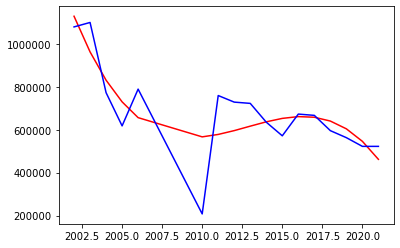

Chemical products


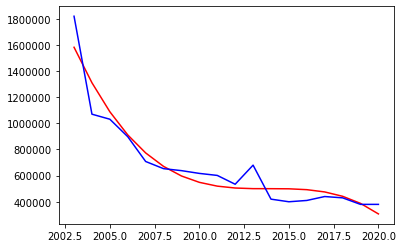

Insurance


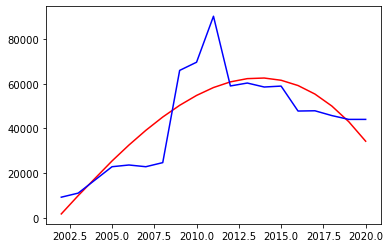

Communication


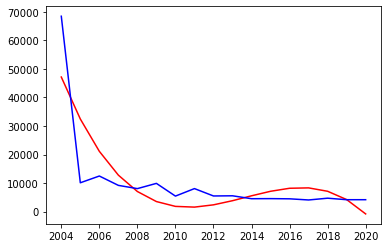

Financial services nec


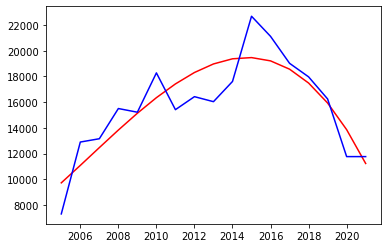

Air transport


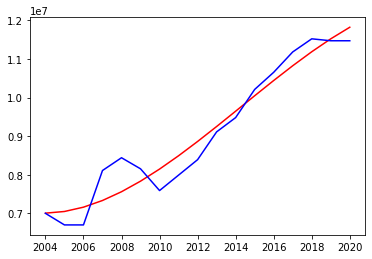

Basic pharmaceutical products


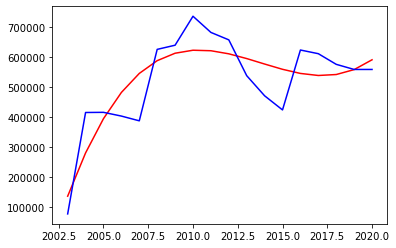

Null


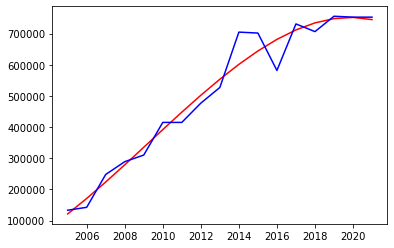

Financial services nec


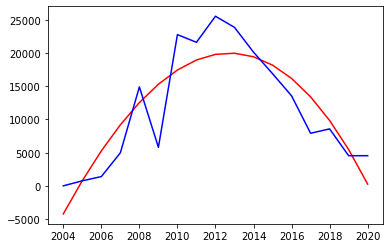

Real estate activities


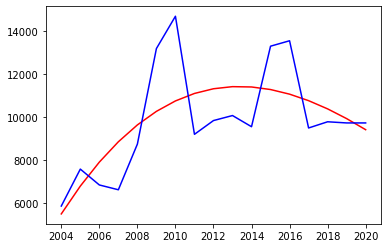

Basic pharmaceutical products


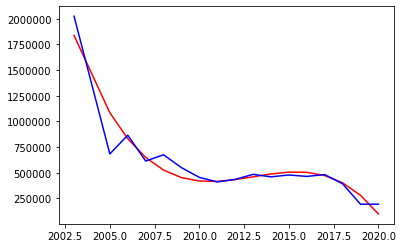

In [27]:
ids = df1_organization['id'].unique()
ids_good = []


for id in ids:
    df_id_only = df1_organization[df1_organization.id == id]
    if len(df_id_only['year'].unique()) > 15:
        ids_good.append(id)
        

for id in ids_good:
    organization_fit(id, 5)
    

    


Communication


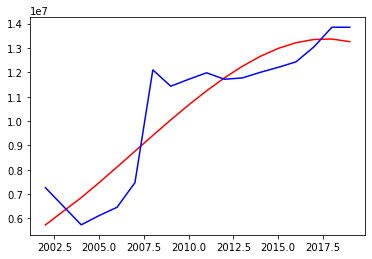

actual:14223000.0
predicted:13259050.60546875
error:0.06777398541315123
Manufactures nec


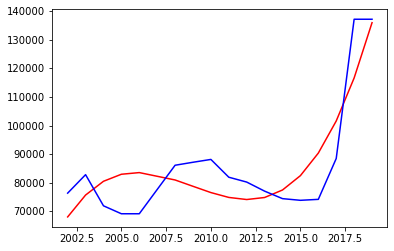

actual:118232.0
predicted:135975.65075683594
error:0.15007485923299899
Null


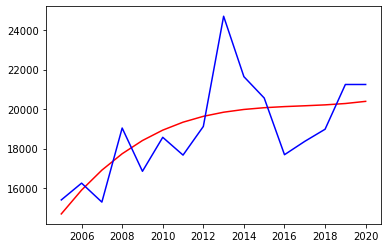

actual:21545.0
predicted:20390.70952606201
error:0.05357579363833782
Other Extraction


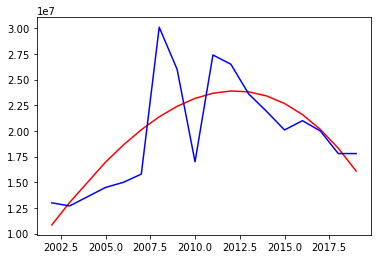

actual:17100000.0
predicted:16095301.1953125
error:0.05875431606359649
Other Extraction


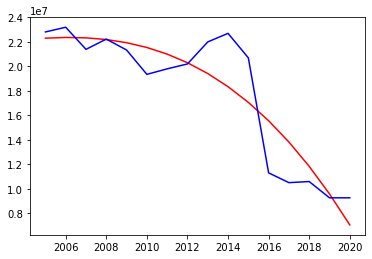

actual:9490000.0
predicted:7045187.01171875
error:0.25761991446588517
Transport nec


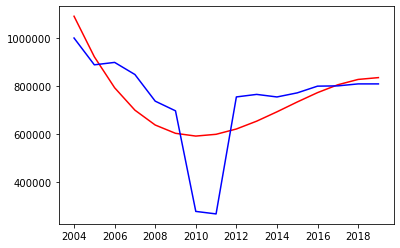

actual:823582.0
predicted:835521.2705078125
error:0.014496759894961886
Computer, electronic and optical products


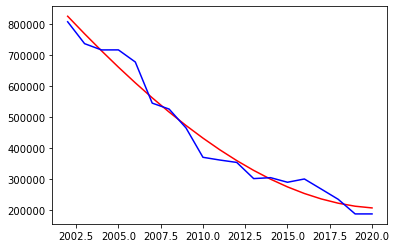

actual:187829.0
predicted:206475.44625854492
error:0.09927352143995295
Communication


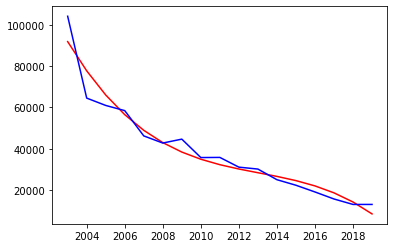

actual:13251.0
predicted:8468.600769042969
error:0.3609085526342941
Chemical products


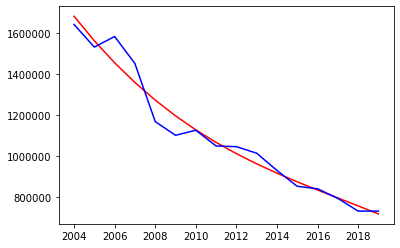

actual:626672.0
predicted:718264.9431152344
error:0.14615770788424307
Chemical products


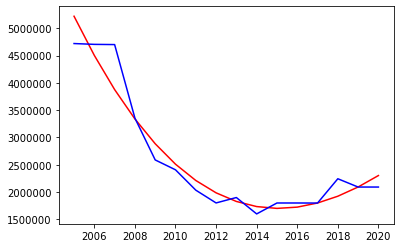

actual:1840000.0
predicted:2302477.6015625
error:0.2513465225883152
Chemical products


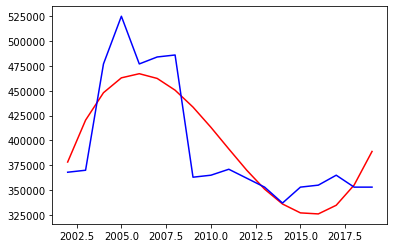

actual:351000.0
predicted:388915.07763671875
error:0.10802016420717593
Other Extraction


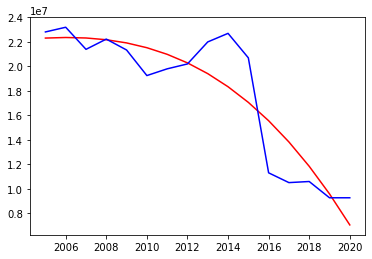

actual:9490000.0
predicted:7041542.93359375
error:0.2580039058383825
Metal products


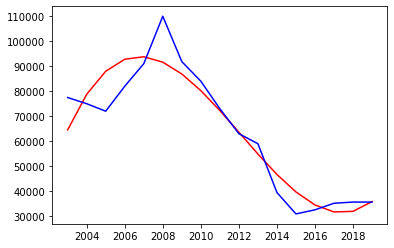

actual:36720.0
predicted:35819.45166015625
error:0.0245247369238494
Null


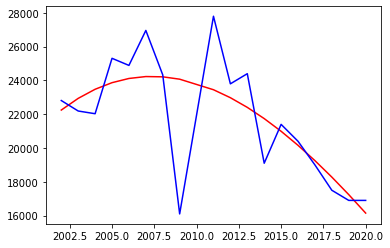

actual:15400.0
predicted:16149.202595710754
error:0.04864951920199704
Electricity


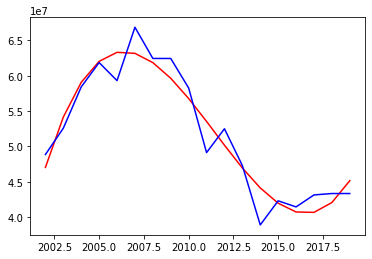

actual:41200000.0
predicted:45164450.875
error:0.09622453580097087
Null


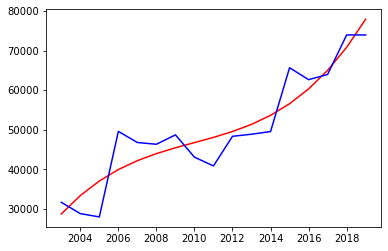

actual:67612.86
predicted:77904.99404907227
error:0.15222154556207598
Financial services nec


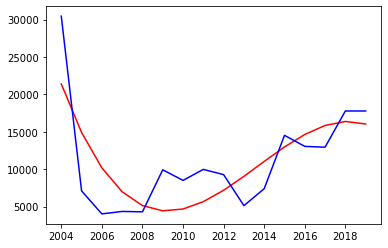

actual:16899.0
predicted:16042.370971679688
error:0.05069110765845982
Electricity


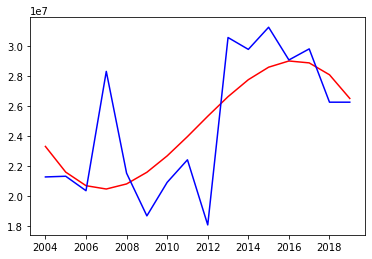

actual:21262000.0
predicted:26501228.28125
error:0.24641276837785722
Basic pharmaceutical products


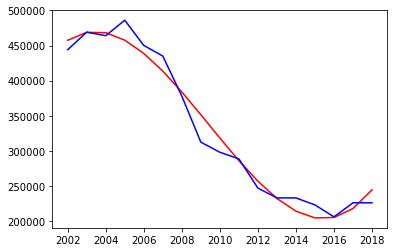

actual:218000.0
predicted:244522.3212890625
error:0.12166202426175458
Bovine cattle, sheep and goats, horses


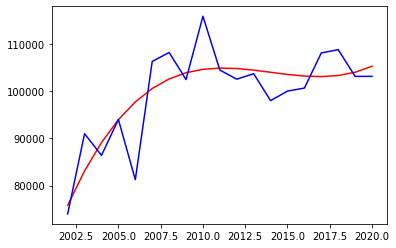

actual:98180.0
predicted:105286.00369262695
error:0.07237730385645705
Manufactures nec


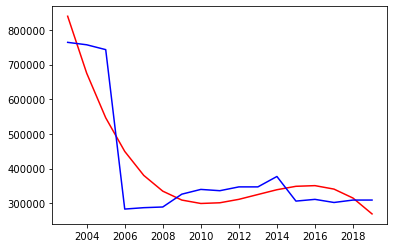

actual:310000.0
predicted:269015.6171875
error:0.13220768649193548
Basic pharmaceutical products


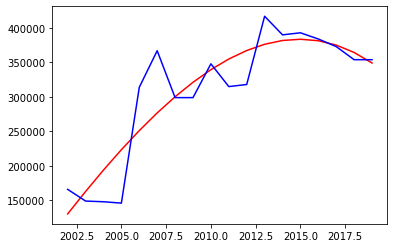

actual:359000.0
predicted:349188.5671386719
error:0.027329896549660514
Null


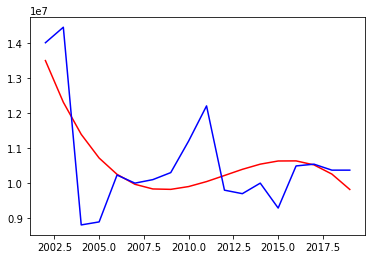

actual:14020000.0
predicted:9820218.953125
error:0.2995564227442939
Computer, electronic and optical products


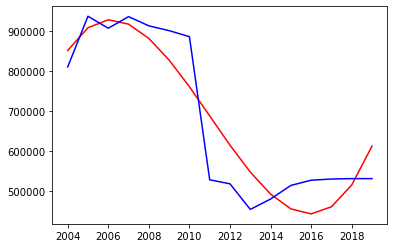

actual:533000.0
predicted:612399.16796875
error:0.1489665440314259
Computer, electronic and optical products


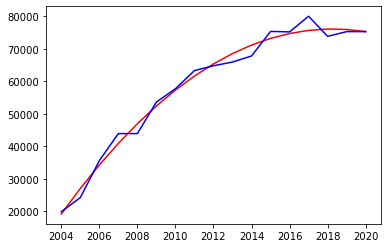

actual:112479.0
predicted:75298.35519695282
error:0.33055632431873666
Real estate activities


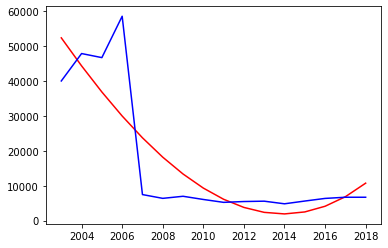

actual:6632.0
predicted:10718.033126831055
error:0.6161087344437658
Bovine cattle, sheep and goats, horses


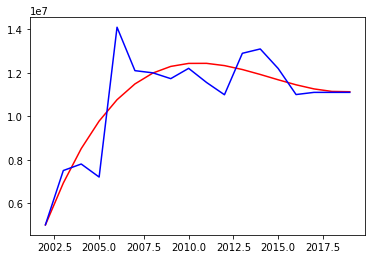

actual:10600000.0
predicted:11129472.890625
error:0.0499502727004717
Null


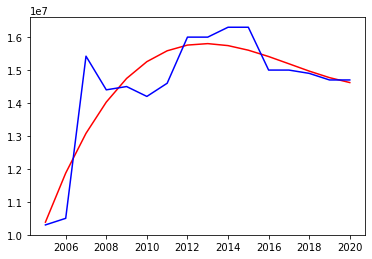

actual:13300000.0
predicted:14620731.7265625
error:0.09930313733552631
Null


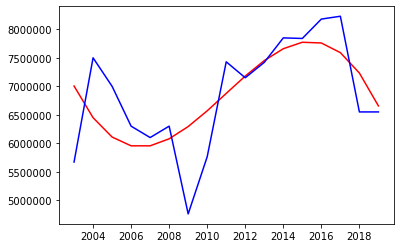

actual:6980000.0
predicted:6655466.171875
error:0.04649481778295129
Null


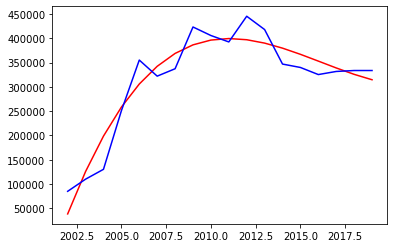

actual:295636.0
predicted:314697.18115234375
error:0.06447516930395401
Electricity


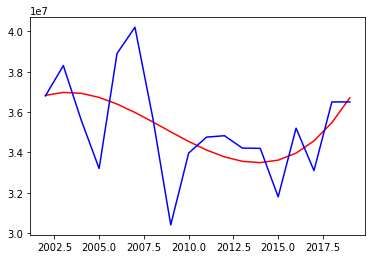

actual:34400000.0
predicted:36701787.8359375
error:0.0669124370912064
Computer, electronic and optical products


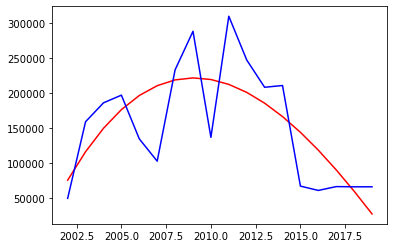

actual:61900.0
predicted:27109.597717285156
error:0.5620420401084789
Null


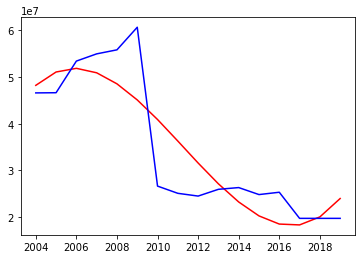

actual:19500000.0
predicted:23953297.875
error:0.22837425
Rubber and plastic products


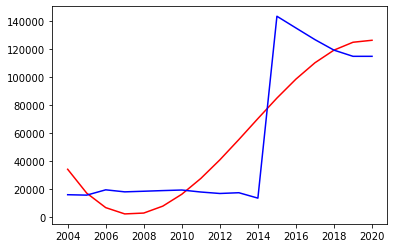

actual:107403.0
predicted:126529.236328125
error:0.17807916285508785
Petroleum, coal products


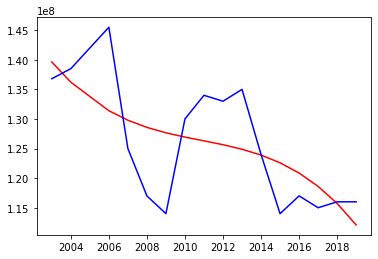

actual:111000000.0
predicted:112095716.78125
error:0.009871322353603603
Petroleum, coal products


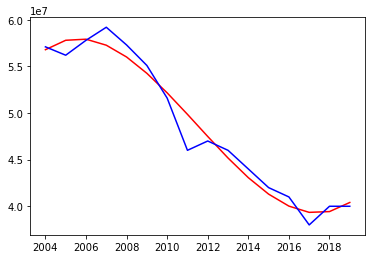

actual:41000000.0
predicted:40405527.78125
error:0.014499322408536585
Bovine cattle, sheep and goats, horses


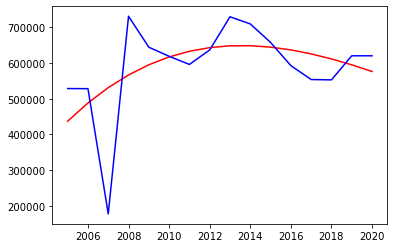

actual:567080.0
predicted:576658.5361328125
error:0.016890978579411194
Beverages and tobacco products


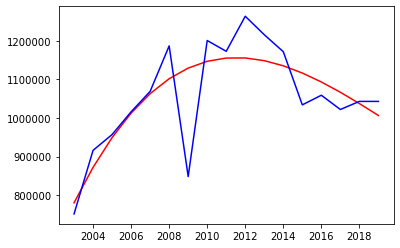

actual:1038000.0
predicted:1006446.9599609375
error:0.030397919112776974
Ferrous metals


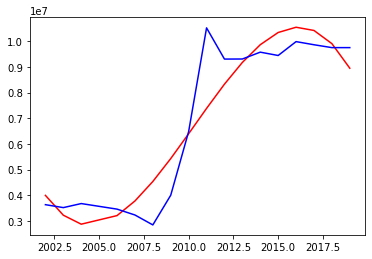

actual:9582000.0
predicted:8952010.25
error:0.06574720830724275
Other Extraction


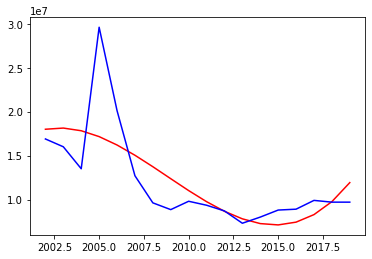

actual:10900000.0
predicted:11922554.75
error:0.0938123623853211
Computer, electronic and optical products


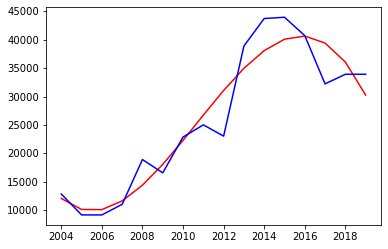

actual:33617.22
predicted:30264.020629882812
error:0.09974648022998893
Basic pharmaceutical products


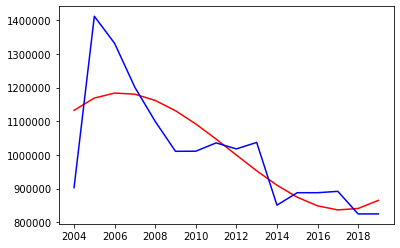

actual:795000.0
predicted:865250.3173828125
error:0.08836517909787736
Bovine cattle, sheep and goats, horses


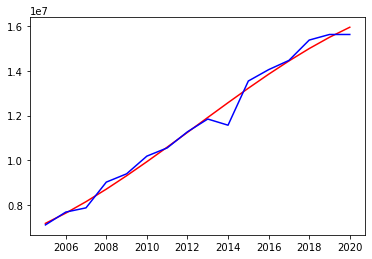

actual:14955000.0
predicted:15965757.462890625
error:0.0675865906312688
Computer, electronic and optical products


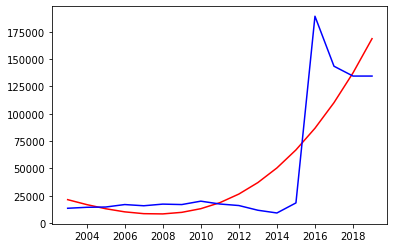

actual:125000.0
predicted:168697.1209716797
error:0.3495769677734375
Petroleum, coal products


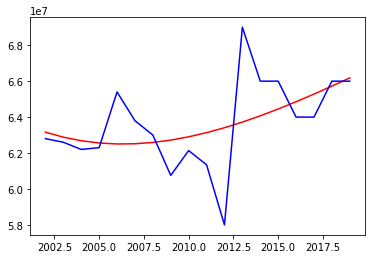

actual:60000000.0
predicted:66179183.02246094
error:0.10298638370768229
Bovine cattle, sheep and goats, horses


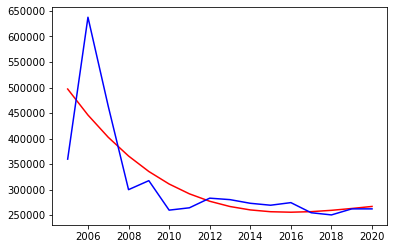

actual:255417.0
predicted:267133.94567871094
error:0.04587378944514632
Electrical equipment


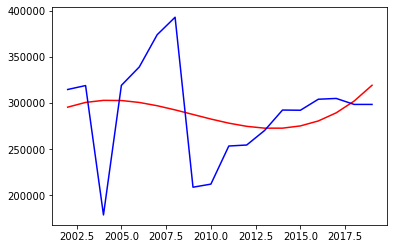

actual:302907.0
predicted:319073.3924560547
error:0.05337081168825642
Construction


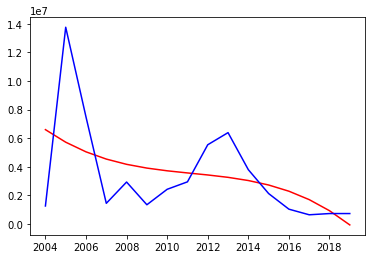

actual:1125206.0
predicted:-55278.640625
error:1.049127573639849
Basic pharmaceutical products


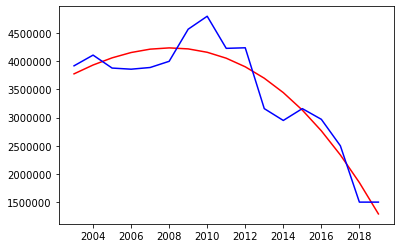

actual:2030000.0
predicted:1290626.6875
error:0.3642233066502463
Ferrous metals


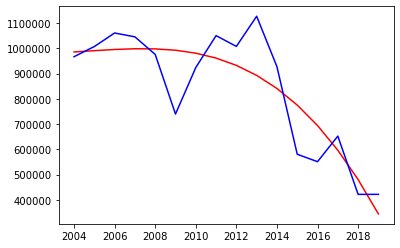

actual:151728.0
predicted:343831.634765625
error:1.2661053646368832
Basic pharmaceutical products


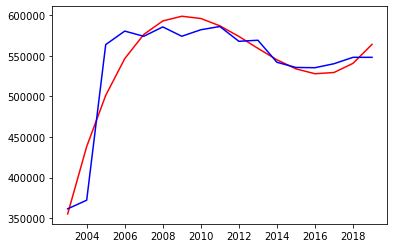

actual:484529.0
predicted:564021.3901367188
error:0.1640611607080665
Water


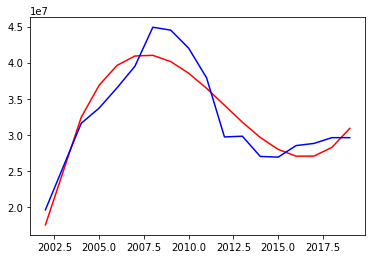

actual:26300000.0
predicted:30882738.1875
error:0.1742486002851711
Null


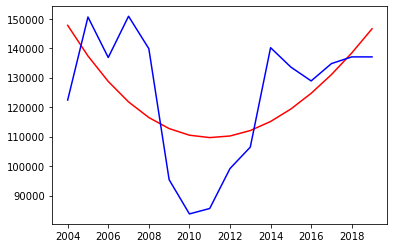

actual:148890.0
predicted:146564.2110595703
error:0.015620853921886543
Null


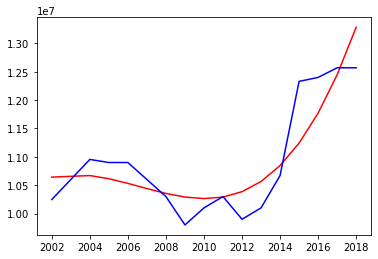

actual:12550000.0
predicted:13284453.66015625
error:0.05852220399651394
Oil


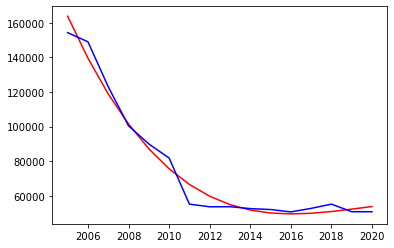

actual:36381.0
predicted:53729.13653564453
error:0.47684606073622304
Fishing


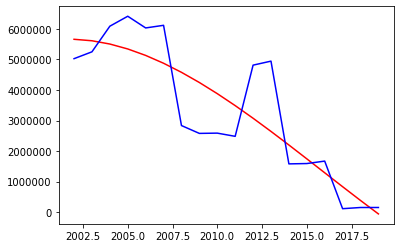

actual:134000.0
predicted:-57194.9326171875
error:1.4268278553521456
Real estate activities


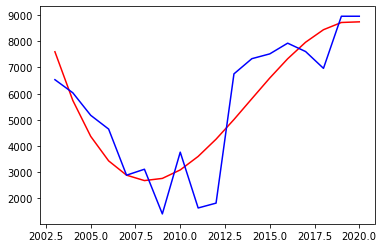

actual:6945.0
predicted:8742.330879211426
error:0.2587949430110044
Accommodation, Food and service activities


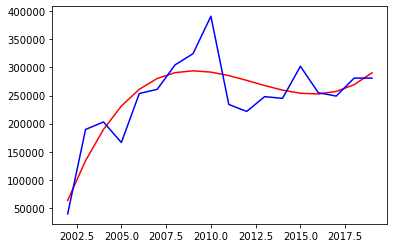

actual:252000.0
predicted:290471.87548828125
error:0.15266617257254464
Financial services nec


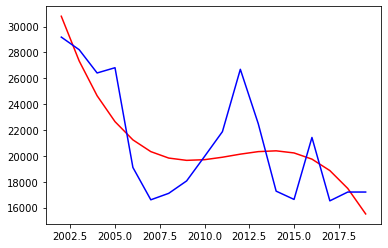

actual:15600.0
predicted:15508.735534667969
error:0.005850286239232772
Machinery and equipment nec


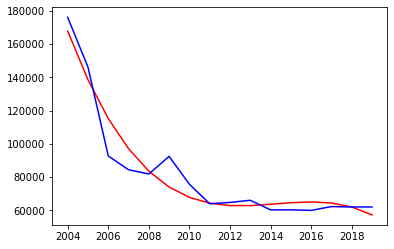

actual:57879.0
predicted:57254.92541503906
error:0.010782400956494367
Motor vehicles and parts


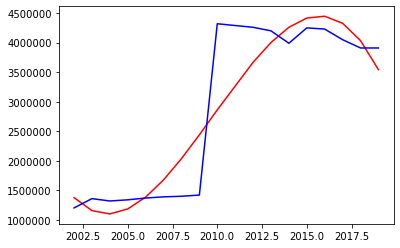

actual:3770000.0
predicted:3543464.65234375
error:0.06008895163295756
Trade


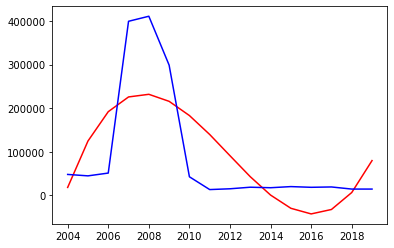

actual:16715.0
predicted:79775.1630859375
error:3.7726690449259648
Null


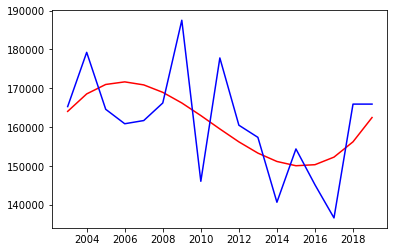

actual:153828.615
predicted:162464.48736572266
error:0.05613957042857511
Machinery and equipment nec


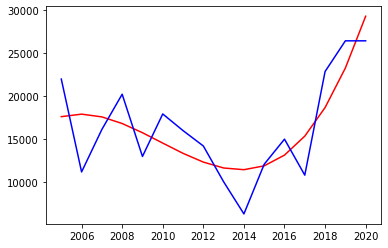

actual:26053.0
predicted:29298.1669921875
error:0.12456020389926305
Null


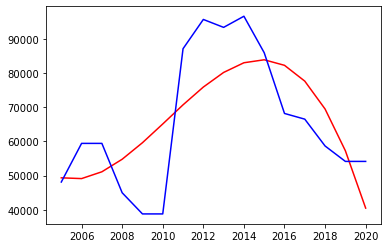

actual:55130.0
predicted:40499.50341796875
error:0.26538176277945313
Computer, electronic and optical products


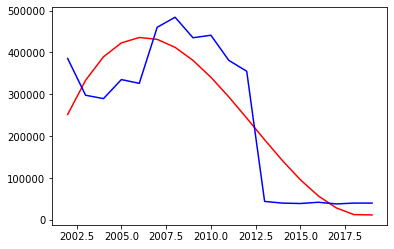

actual:35000.0
predicted:11759.31787109375
error:0.6640194893973215
Financial services nec


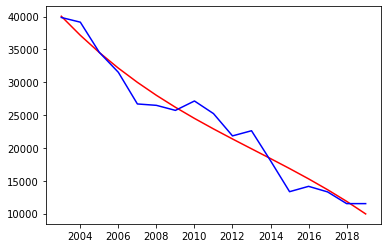

actual:10574.0
predicted:9954.072631835938
error:0.05862751732211675
Real estate activities


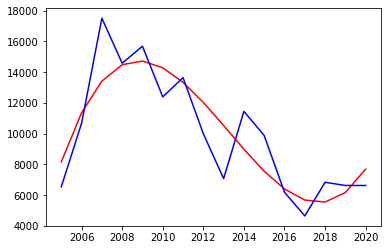

actual:7458.0
predicted:7683.396392822266
error:0.030222096114543528
Insurance


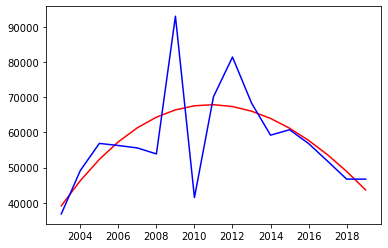

actual:42011.0
predicted:43657.08737945557
error:0.039182294624159536
Transport nec


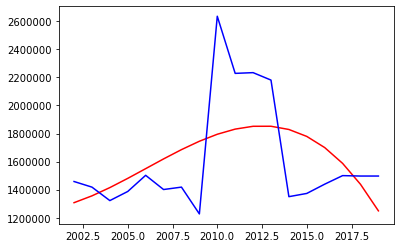

actual:1347000.0
predicted:1248886.7529296875
error:0.07283834229421864
Null


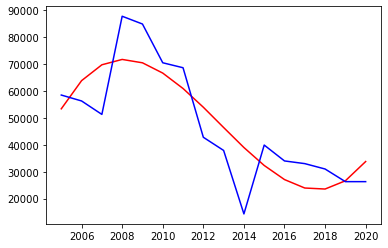

actual:16800.0
predicted:33775.78552246094
error:1.0104634239560082
Machinery and equipment nec


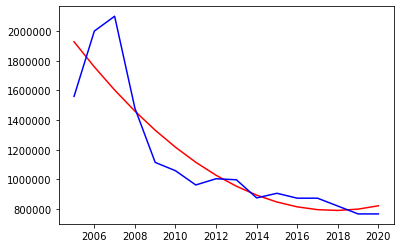

actual:524000.0
predicted:822808.7453804016
error:0.5702456972908427
Motor vehicles and parts


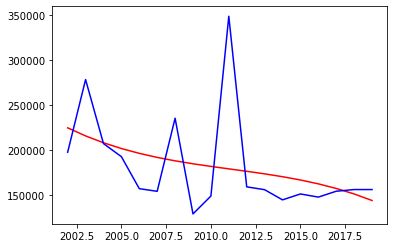

actual:160551.0
predicted:144364.38766479492
error:0.10081913121192068
Machinery and equipment nec


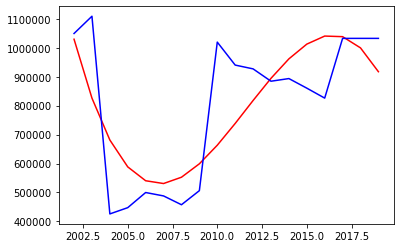

actual:686713.0
predicted:917298.5625
error:0.33578156012773896
Petroleum, coal products


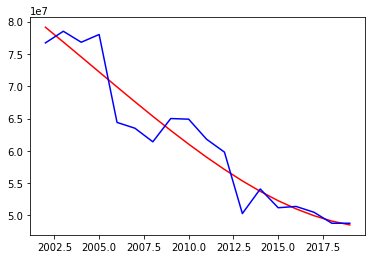

actual:49200000.0
predicted:48542761.109375
error:0.013358514037093495
Computer, electronic and optical products


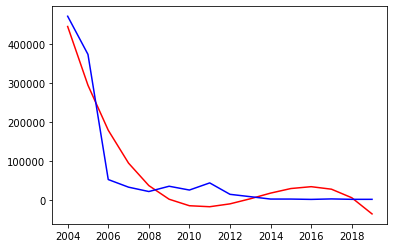

actual:3190.0
predicted:-34551.2099609375
error:11.831100301234326
Null


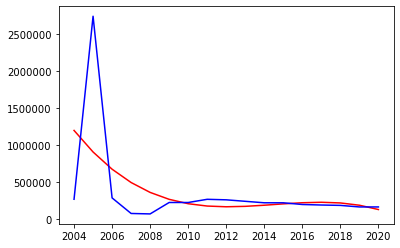

actual:138000.0
predicted:129137.0869140625
error:0.06422400786911232
Basic pharmaceutical products


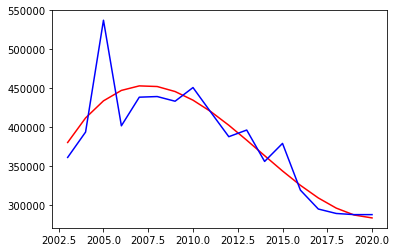

actual:256815.0
predicted:283932.0256347656
error:0.10558972659216022
Electricity


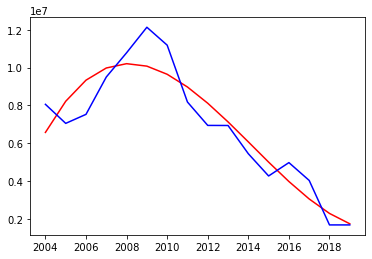

actual:2246167.0
predicted:1758401.03125
error:0.21715481028347403
Transport nec


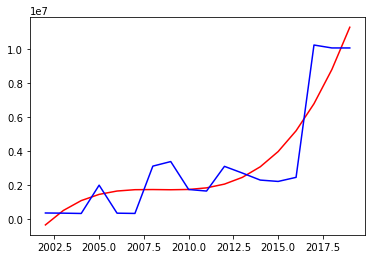

actual:6969000.0
predicted:11257619.046875
error:0.6153851408918066
Chemical products


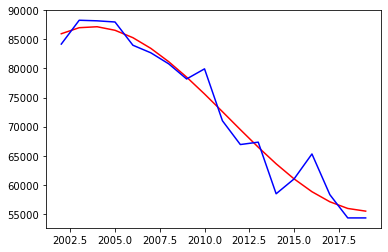

actual:50000.0
predicted:55465.3708190918
error:0.10930741638183594
Motor vehicles and parts


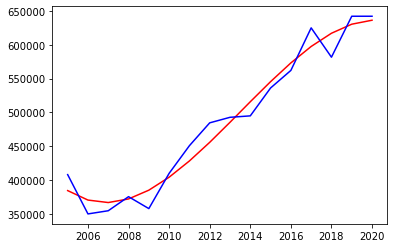

actual:642885.0
predicted:636372.986328125
error:0.010129360106200953
Petroleum, coal products


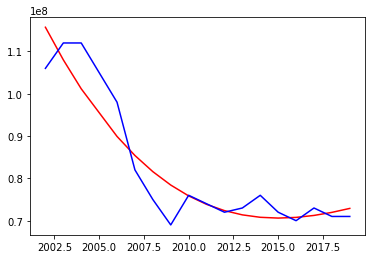

actual:70000000.0
predicted:72901673.21875
error:0.04145247455357143
Bovine cattle, sheep and goats, horses


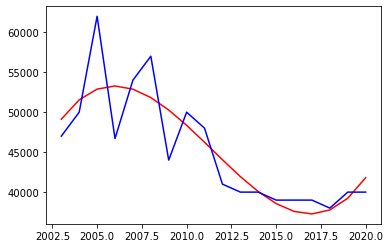

actual:37000.0
predicted:41802.22393798828
error:0.12978983616184545
Null
Null


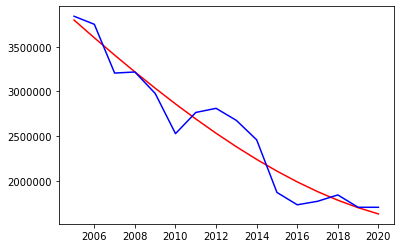

actual:1571000.0
predicted:1630964.743774414
error:0.03816979234526675
Trade


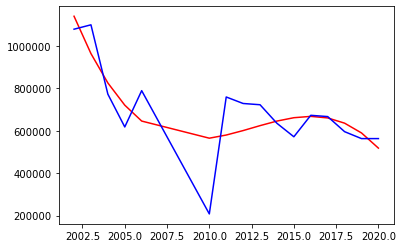

actual:522433.0
predicted:518126.708984375
error:0.00824276225970603
Chemical products


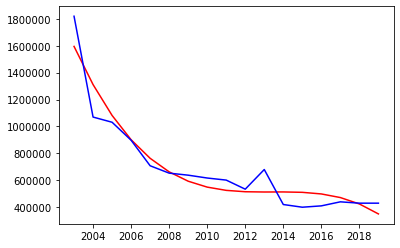

actual:380000.0
predicted:350169.1796875
error:0.07850215871710527
Insurance


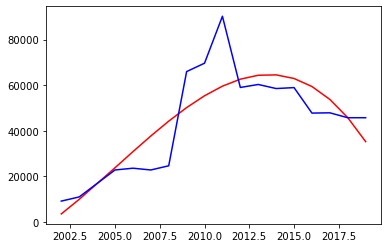

actual:44023.0
predicted:35236.57800292969
error:0.19958707941463127
Communication


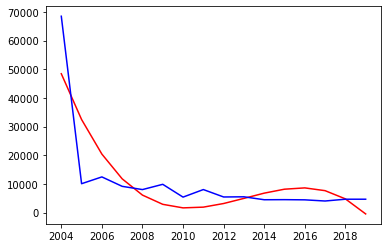

actual:4156.0
predicted:-440.563720703125
error:1.1060066700440627
Financial services nec


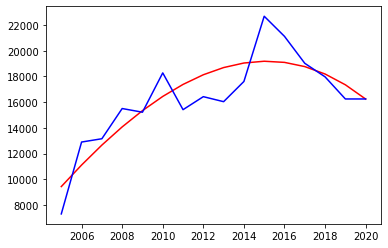

actual:11762.0
predicted:16241.113611221313
error:0.3808122437698787
Air transport


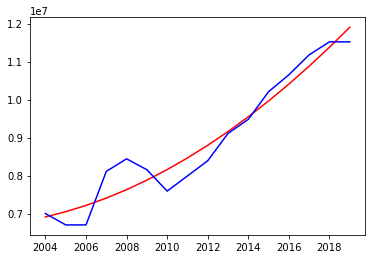

actual:11470000.0
predicted:11904558.5256958
error:0.037886532318727184
Basic pharmaceutical products


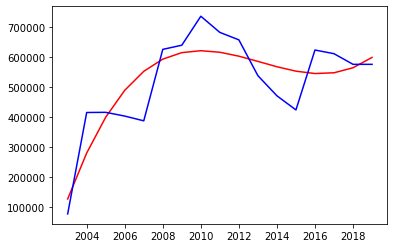

actual:559421.0
predicted:599542.640625
error:0.07171994012559414
Null


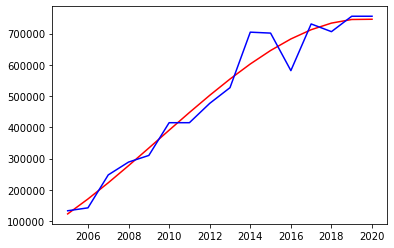

actual:752552.0
predicted:745847.0234375
error:0.00890965217353751
Financial services nec


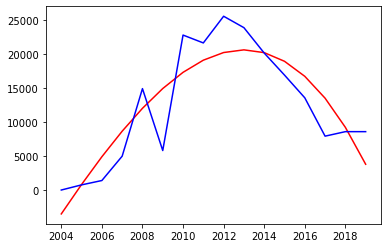

actual:4542.0
predicted:3789.833724975586
error:0.16560243835852356
Real estate activities


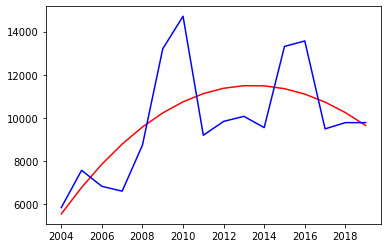

actual:9732.0
predicted:9652.602005958557
error:0.008158445750251014
Basic pharmaceutical products


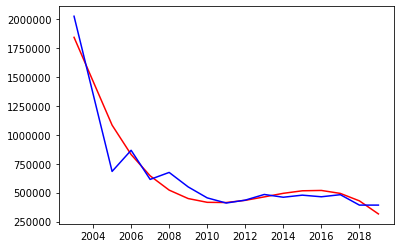

actual:193000.0
predicted:315786.423828125
error:0.6361990871923575
percentage error: 36.07201651104658%


In [30]:
errors = []

def mean(list):
    return sum(list) / len(list)
    
    
    
for id in ids_good:
    errors.append(fit_validation(id, 3))
    
accuracy = mean(errors) * 100
print('percentage error: ' + str(accuracy) + '%')
    
    
    

In [ ]:
print(errors)